<img src="http://www3.ifmg.edu.br/site_campi/p/images/logos/Betim-Simples.png" width="700"></img>
<b>Engenharia de Controle e Automação - Processamento de sinais</b> - Prof. Leandro Freitas

# João Vitor Prata Moreira Salgado - 0038210
# Fernando Andrade da Silva - 0037130
## Trabalho Prático 05
### Projeto de Filtros IIR


## Introdução
Aplicar um método em busca de uma resposta em frequência desejada, por uma função de transferência, cosiste numa razão de polinômios. De certa forma, na maioria das vezes, essa função de transferência resulta em uma resposta ao impulso com duração infinita, tal qual são nomeados de filtros com resposta ao impsulso de duração infinita (IIR). Esses filtros são capazes de aproximar uma resposta na frequência prescrita com um número de multiplicações menor que os filtros FIR, por esse motivo, os filtros IIR podem ser mais adequados a algumas aplicações práticas, especialmente aquelas envolvendo processamento de sinais em tempo real. Para isso, existem métodos clássicos para aproximações de filtros analógicos como de Butterworth, Chebyshev e elíptica, que são mais utilizados para aproximações de módulo prescritas.

## Objetivo
Projeto e implementação de filtros IIR, em diferenter aproximações.

# PROJETO DE FILTROS IIR
Para isso, considere o sinal: x(t) = 1,5 sin(2πa1t) − 3 sin(2πa2t) + 2 sin(2π(a1 + a2)t), em que a1 e a2 são respectivamente o último número do registro acadêmico (RA) de cada integrante da dupla, sendo que a1 < a2 e que a1 ≠ a2, sendo estes não nulos. Portanto, se os últimos números forem iguais ou um deles for zero, escolha o penúltimo dígito de um dos alunos.

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.io import wavfile
from scipy import signal

In [ ]:
a1=1
a2=3
fs = 3200*(a1+a2)
t = np.arange(0,100,1/fs)
x = 5*np.sin(200*np.pi*a1*t) - 3*np.sin(200*np.pi*a2*t) + 4*np.sin(200*np.pi*(a1+a2)*t)

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(t,x,'b')
plt.xlabel('tempo [s]')
plt.xlim(0,(np.pi/30))
plt.show()

In [ ]:
x_sp = np.fft.fft(x) #espectro do sinal
x_freq = np.fft.fftfreq(len(x), 1/2/np.pi) 
plt.figure(figsize=(20,5))
plt.plot(x_freq,abs(x_sp),'b')
plt.xlabel('Frequencia [rad]')
plt.xlim((0,0.3))
plt.show()

# Passa baixa
## Filtro Butterworth

a) Passa-baixas (ya): em que apenas a frequência correspondente à a1 apareça na saída do filtro;

Aproximação por Butterworth é caracterizada por uma resposta maximamente plana, sendo que, sua atenuação 
aumenta lentamente com a frequência na faixa de passagem e rapidamente na faixa de rejeição. 
Além disso, podemos notar que ajustando a faixa de reijeição para mais ou para menos, há uma 
implicação direta na ordem do filtro, e essa ordem, corresponde numa variação da atenuação. 

In [ ]:
Ap = 0.5    #dB
Ar = 65     #dB
gp = -Ap
gr = -Ar
dr = 10**(gr/20)
dp = 1-10**(gp/20)
wr = (200*np.pi*a1)+850
wp = (200*np.pi*a1)+200


In [ ]:
N,Wn = sp.signal.buttord(wr,wp, Ap, Ar,analog = True)
print(N,Wn)

In [ ]:
z,p,k =sp.signal.buttap(N)

In [ ]:
b,a = sp.signal.zpk2tf(z,p,k)

In [ ]:
w, h = sp.signal.freqs(b, a, np.linspace(0, 10, 10000))

In [ ]:
plt.plot(w, (abs(h)),'b')
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.fill([0, 0,  0.7,  0.7], [0, .98,.98 ,0 ], '0.8', lw=0) # pass
plt.fill([2, 2, 10, 10], [0,  0.99,  0.99, 0], '0.8') # stop
plt.grid(which='both', axis='both')
plt.show()

In [ ]:
wo = (wp+wr)/2

In [ ]:
q, o =sp.signal.lp2lp(b, a, wo)

In [ ]:
a1=1
a2=3
fs = 50*2*200*(a1+a2)
print(fs)
t = np.arange(0,5,1/fs)
x = 5*np.sin(200*np.pi*a1*t) - 3*np.sin(200*np.pi*a2*t) + 4*np.sin(200*np.pi*(a1+a2)*t)

at,yaout,xaout=sp.signal.lsim2((q,o), x, t)

In [ ]:
yaideal=5*np.sin(200*np.pi*a1*t)

In [ ]:
plt.figure(figsize=(30,6))
plt.plot(at, yaout,'b',label="Filtrado")
plt.plot(t,yaideal,'r',label="Nao Filtrado")
plt.title('Sinal filtrado x sinal ideal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend(loc='lower right')
plt.grid(which='both', axis='both')
plt.xlim((0, .05))
plt.show()

# Filtro passa-alta
## Filtro elíptico
b) Passa-altas (yb): em que apenas a frequência correspondente à a1 + a2 apareça na saída do filtro;

Filtros elípticos são bastante eficientes quanto à redução da complexidade computacional
devido às faixas de passagem e rejeição. De ceta forma aproximação 
elíptica tem características que permitem obter a mais rápida transição
entre a banda de passagem e a banda de corte, além de conter oscilações controladas. Isto significa que ele minimiza
o erro máximo entre ambas as bandas, ao contrário do filtro Chebyshev, que apresenta ripple apenas na banda passante, ou no caso do Chebyshev inverso, na banda rejeição.

In [5]:
Ap = 0.5    #dB
Ar = 35     #dB - Peso 
gp = -Ap
gr = -Ar

wr_pa = 200*np.pi*(a1+a2)-150
wp_pa = 200*np.pi*(a1+a2)-50



In [6]:
N_pa,Wn_pa = sp.signal.ellipord(wr_pa,wp_pa, Ap, Ar,analog = True) #funcao retorna a ordem do filtro de acordo com as freq 

z_pa,p_pa,k_pa = sp.signal.ellipap(N_pa,Ap,Ar)

b_pa,a_pa = sp.signal.zpk2tf(z_pa,p_pa,k_pa)

w_pa, h_pa = sp.signal.freqs(b_pa, a_pa, np.linspace(0, 10, 500))

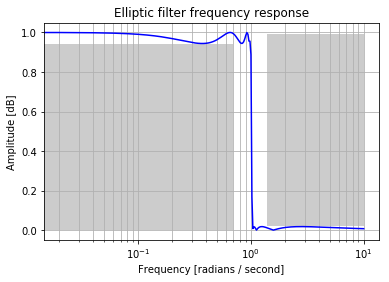

In [7]:
plt.plot(w_pa, (abs(h_pa)),"b")
plt.xscale('log')
plt.title('Elliptic filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins()
plt.fill([0, 0,  0.7,  0.7], [0, .94, .94,0 ], '0.8', lw=0) # pass
plt.fill([1.4, 1.4, 10, 10], [0.02,  0.99,  0.99, 0.02], '0.8') # stop
plt.grid(which='both', axis='both')
plt.show()

In [ ]:
wo_pa = (wp_pa+wr_pa)/2 #formula para frequencia de corte ( Media de freq passagem e freq de rejeicao)
q_pa,o_pa = sp.signal.lp2hp(b_pa, a_pa, wo_pa)

at_pa,yaout_pa,xaout_pa= sp.signal.lsim2((q_pa,o_pa), x, t)

ybideal = 4*np.sin(200*np.pi*(a1+a2)*t)

In [ ]:
plt.figure(figsize=(30,6))
plt.plot(at_pa, yaout_pa, 'b',label="Filtrado")
plt.plot(t,ybideal,'r',label="Nao Filtrado")
plt.title('Sinal filtrado x Sinal ideal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend(loc='lower right')
plt.grid(which='both', axis='both')
plt.xlim(0,0.04)
plt.show()



## Rejeita faixa

c) Rejeita-faixa (yc): em que a frequência correspondente à a2 seja filtrada e não apareça na saída do filtro.

Na aproximação Chebyshev, pode-se obter uma maior inclinação entre a banda passante e a banda de corte, 
autorizando uma banda de transição mais estreita, e comprometendo a resposta em frequência na banda de passagem ou de corte.
Nesse sentido o Chebyshev tipo II apresenta odulação na banda de rejeição.

In [ ]:
Ap = 30    #dB
Ar = 65     #dB
gp = -Ap
gr = -Ar

wr1_rf = (200*np.pi*a2)-50
wp1_rf = (200*np.pi*a2)-70
wp2_rf = (200*np.pi*a2)+150
wr2_rf = (200*np.pi*a2)+130

In [ ]:
N_rf,Wn1_rf = sp.signal.cheb2ord([wr1_rf,wr2_rf],[wp1_rf,wp2_rf],Ap, Ar,analog = True) 

In [ ]:
N_rf

In [ ]:
z_rf,p_rf,k_rf = sp.signal.cheb2ap(N_rf,Ap)

In [ ]:
b_rf,a_rf = sp.signal.zpk2tf(z_rf,p_rf,k_rf)

In [ ]:
w_rf, h_rf = sp.signal.freqs(b_rf, a_rf, np.linspace(0, 10, 500))

In [ ]:
plt.plot(w_rf, abs(h_rf), "b")
plt.xscale('log')
plt.title('Chebyshev 2 filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.fill([0, 0,  0.7,  0.7], [0, .98, .98,0 ], '0.8', lw=0) # pass
plt.fill([1.4, 1.4, 10, 10], [0.03,  0.99,  0.99, 0.023], '0.8') # stop
#plt.xlim()
plt.grid(which='both', axis='both')

In [ ]:
wo_rf = 200*(a2*np.pi)
bw_rf = (wp2_rf - wp1_rf)


q_rf,o_rf = sp.signal.lp2bs(b_rf, a_rf,wo_rf, bw_rf)

at_rf,yaout_rf,xaout_rf = sp.signal.lsim2((q_rf,o_rf), x, t)

ycideal = 3*np.sin(200*np.pi*a2*t)

In [ ]:
plt.figure(figsize=(30,6))
plt.plot(at_rf, yaout_rf, 'b',label="Filtrado")
plt.plot(t,ycideal,'r',label="Nao Filtrado")
plt.title('Sinal filtrado x Sinal ideal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend(loc='lower right')
plt.grid(which='both', axis='both')
plt.xlim(0,.02)
plt.show()


Neste trabalho, apresentou-se o projeto e implementação no software computacional Jupyter Notebook, filtros
IIR. Onde foram desenvolvidos três filtros por aproximação, Butterworth, Chebyshev tipo II e Elípticos.
Sendo assim, através dos cálculos realizados para projetar e identificar, características do filtro,
como frequência de amostragem,banda de passagem, banda de rejeição, frequência de corte, de rejeição, entre outros mais,
foi possível obter gráficos que trouxeram uma boa compreensão do comportamento de cada filtro projetado e simulado.
Por outro lado, também foi possível observar o quanto aproximações de filtros analógicos podem apresentar mau condicionamento,
quando o mesmo tem uma faixa de transição ou de passagem muito estreita. Entretando, foi muito importante e proveitoso ter
contato com essa ferramenta, além de propiciar uma gama de possibilidades e utilizades que estas e outras podem ser aplicadas. 

Referência:

1 - S.R.DINIZ, Paulo; A.B DA SILVA, Eduardo; L.NETTO, Sergio. Processamento Digital de Sinais: projeto e análise de sistemas..
    2º. ed. Porto Alegre: Bookman, 2014. 976 p.

2 -S, Sphinx. Signal processing: (scipy.signal). 2018. Disponível em: <https://docs.scipy.org/doc/scipy-0.17.0/reference/signal.html>.
            Acesso em: 05 dez. 2018.
            
3 -HIGUTI, R. T., Notas de aula de PDS, dispon´ıvel em http://www.feis.unesp.br/